In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def test_run():
    start_date='2010-01-22'
    end_date='2010-01-26'
    
    dates = pd.date_range(start_date, end_date)
    #print(dates)
    df1 = pd.DataFrame(index=dates)
    
    dfSPY = pd.read_csv('Data/SPY.csv', index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'])
    
    dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
    df1 = df1.join(dfSPY, how = 'inner').dropna()
    
    symbols = ['GOOG', 'IBM', 'GLD']
    for symbol in symbols:
        df_temp = pd.read_csv("Data/{}.csv".format(symbol), index_col='Date', parse_dates=True, 
                              usecols=['Date', 'Adj Close'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        
        df1 = df1.join(df_temp)
    
    
    print(df1)
if __name__ == '__main__':

    test_run()
    

                  SPY       GOOG        IBM         GLD
2010-01-22  84.600212  13.698903  74.234856  107.169998
2010-01-25  85.034012  13.449588  74.601578  107.480003
2010-01-26  84.677666  13.509862  74.382759  107.559998


In [3]:
def get_max_close(symbol):
    
    df = pd.read_csv('Data/{}.csv'.format(symbol))
    
    return df['Close'].max()


def test_run():
    for symbol in ['AAPL', 'IBM']:
        print('Max Close')
        print(symbol, get_max_close(symbol))
        

if __name__ == '__main__':
    
    test_run()


Max Close
AAPL 196.449997
Max Close
IBM 206.309753


In [4]:
def get_mean_volume(symbol):
    """Return the mean volume for stock indicated by symbol.
    
    Note: Data for a stock is stored in file: data/<symbol>.csv
    """
    df = pd.read_csv("Data/{}.csv".format(symbol))  # read in data
    # TODO: Compute and return the mean volume for this stock
    return df['Volume'].mean()


def test_run():
    """Function called by Test Run."""
    for symbol in ['AAPL', 'IBM']:
        print("Mean Volume")
        print(symbol, get_mean_volume(symbol))


if __name__ == "__main__":
    test_run()

Mean Volume
AAPL 323754426.2243286
Mean Volume
IBM 5094246.837694985


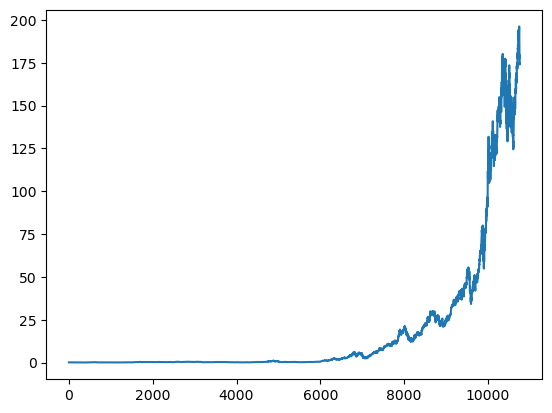

In [5]:
def test_run2():
    df = df = pd.read_csv("Data/AAPL.csv")
    df['Adj Close'].plot()
    plt.show()
    
if __name__ == "__main__":
    test_run2()   

In [6]:
df = df = pd.read_csv("Data/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...,...
10756,2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600
10757,2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600
10758,2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900
10759,2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900


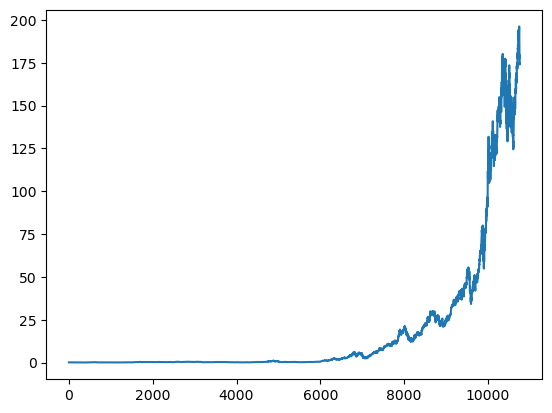

In [7]:
plt.plot(df['Adj Close'])

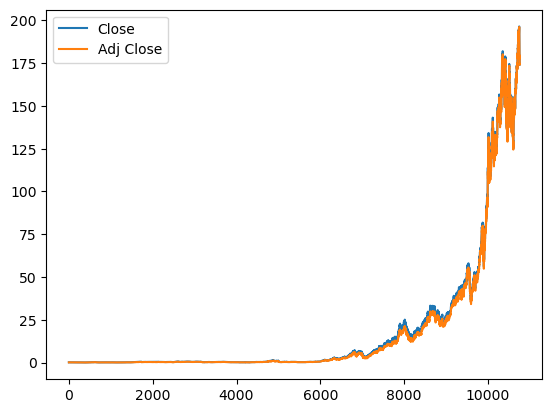

In [8]:
def test_run2():
    df = df = pd.read_csv("Data/AAPL.csv")
    df[['Close', 'Adj Close']].plot()
    plt.show()
    
if __name__ == "__main__":
    test_run2() 

In [9]:
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="Data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')



symbols = ['SPY', 'GLD', 'GOOG', 'IBM']
dates = pd.date_range('2010-01-01', '2023-07-30')
#print(dates)
df = pd.DataFrame(index=dates)


for symbol in symbols:
    df_temp = pd.read_csv(symbol_to_path(symbol),  index_col='Date', parse_dates=True, 
                          usecols=['Date', 'Adj Close'])
    
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df = df.join(df_temp).dropna()
    
df



,SPY,GLD,GOOG,IBM
2010-01-04,87.791786,109.800003,15.610239,78.345863
2010-01-05,88.024178,109.699997,15.541497,77.399452
2010-01-06,88.086151,111.510002,15.149715,76.896652
2010-01-07,88.457954,110.820000,14.797037,76.630486
2010-01-08,88.752350,111.370003,14.994298,77.399452
...,...,...,...,...
2023-07-24,454.200012,181.399994,121.879997,137.952469
2023-07-25,455.440002,182.410004,122.790001,138.733490
2023-07-26,455.510010,183.300003,129.660004,139.465073
2023-07-27,452.489990,180.419998,129.869995,141.343445


Text(0.5, 1.0, 'Stock Prices')

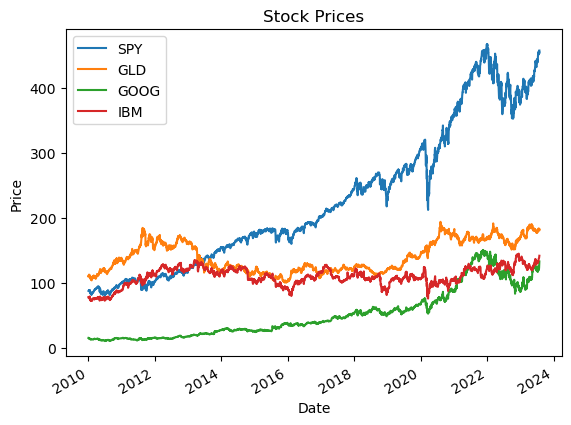

In [10]:

df.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')

Text(0.5, 1.0, 'Normalized Stock Prices')

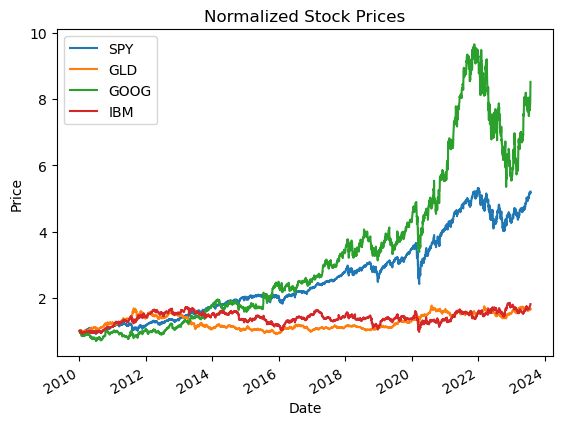

In [11]:
df = df/df.iloc[0, :]
df.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Normalized Stock Prices')

Text(0.5, 1.0, 'Normalized Stock Prices')

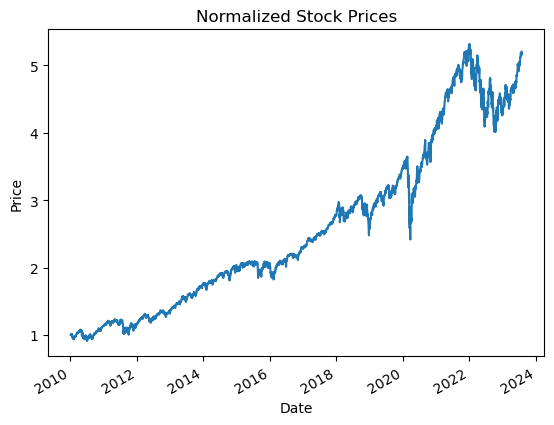

In [12]:
df = df['SPY']
df.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Normalized Stock Prices')